In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [0]:
#combined training and testing sets to have entire dataset to ensure features are the
#same in both train and test sets
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#2. Get the file
downloaded = drive.CreateFile({'id':'16N6CwZ16PBfQf1Jj2zEwSBq3bKpYi0gP'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')
downloaded = drive.CreateFile({'id':'1deEEIhUO5NJGebfWNfS0rzBtZhoPB8zh'})
downloaded.GetContentFile('test.csv')


#3. Read file as panda dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]    

In [0]:
###########################################
#PLAYING WITH VARIABLES
##########################################

X_train = train_df.drop(['url', ' shares'],axis=1)
#X_train = train_df[[' num_imgs']]

Y_train = train_df[' shares']

#X_test = test_df[[' num_imgs']]
X_test = test_df.drop(['url', ' shares'],axis=1)
Y_test = test_df[' shares']

#X_train = train_df[[' global_subjectivity',' weekday_is_sunday',' LDA_01', ' is_weekend', ' data_channel_is_tech',' data_channel_is_lifestyle',' LDA_00', ' data_channel_is_world']] #X_train is the training data withour the 1st and 61st column
#Y_train = train_df[' shares']                      #Y_train only contains our target variable
#X_test = test_df[[' global_subjectivity',' weekday_is_sunday',' LDA_01', ' is_weekend',  ' data_channel_is_tech',' data_channel_is_lifestyle', ' LDA_00', ' data_channel_is_world']]  #X_test = "Original_data - X_train"
#Y_test = test_df[' shares']                        #Y_test is used to verify the accuracy against what we predict later.

In [32]:
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred = linreg.predict(X_test)

y_pred = pd.DataFrame({
        "url": test_df["url"],
        "Shares": Y_pred
    })

y_pred['Shares'] = y_pred['Shares'].astype(int)
    
#y_pred.to_csv('pred_using_imgs.csv', index=False)

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

print('Test score:', linreg.score(X_test,Y_test))
print('Training score:', linreg.score(X_train,Y_train))

#r2 score finds the distance between predicted and actual value

Coefficients: 
 [ 1.61110255e+00  1.06023348e+02  4.59939919e-01  2.73893206e+03
 -1.71257715e+03 -1.69841793e+03  2.50432594e+01 -6.15712349e+01
  1.16613727e+01  7.41234904e+00 -3.66626424e+02  6.31709809e+01
 -1.33759681e+03 -1.00890510e+03 -9.11361158e+02 -6.96000109e+02
 -5.46870264e+02 -5.43938558e+02  4.38568719e-01  5.10484650e-02
  2.89880727e-01 -2.83619713e-03 -3.91279379e-04  8.89039159e-04
 -3.74069443e-01 -2.23807122e-01  1.68315793e+00  3.11151238e-02
  7.73740172e-03 -1.08426194e-02  4.26971283e+02 -3.01656037e+02
  4.33277046e+00 -2.10800490e+02 -1.20254652e+02  2.53144200e+02
 -5.17370734e+01  2.01407126e+02  6.06582662e+02 -3.63556257e+02
 -5.12712850e+02  3.51290287e+01  2.34557416e+02  2.00416480e+03
  2.32885515e+03 -1.33495192e+04 -2.73785163e+02  1.58435460e+03
  2.11423984e+03 -2.23041849e+03 -1.68025853e+03  4.59663196e+02
 -3.11124062e+03  3.50846341e+02  5.55864178e+02 -1.53192664e+02
  9.74915356e+01  6.88493604e+02  7.02837482e+02]
Mean squared error: 1936

Coefficients: 
 [72.86642832]
Mean squared error: 76080780.97
Variance score: 0.00


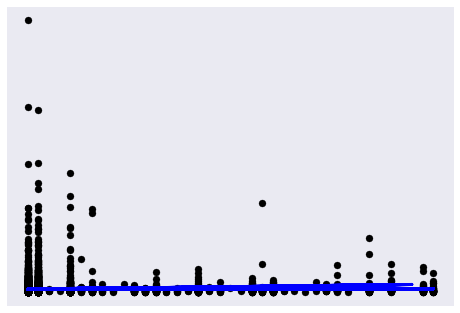

In [33]:
#X_train = train_df.drop(['url', ' shares'],axis=1)
X_train = train_df[[' num_videos']]
Y_train = train_df[' shares']
X_test = test_df[[' num_videos']]
#X_test = test_df.drop(['url', ' shares'],axis=1)
Y_test = test_df[' shares']
linreg = LinearRegression()
linreg.fit(X_train,Y_train)
Y_pred = linreg.predict(X_test)

# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()
